<a href="https://colab.research.google.com/github/clopensesame/Nazzaro_DSPN_S24/blob/main/Exercise_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
install.packages(c("class","tidyverse","ISLR"))
library(class)
library(tidyverse)
library(ISLR)
library(ggplot2)
library(boot)

In [2]:
#file on desktop
d1 <- read.csv("/content/unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 <- d1 %>%
  select(Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol) %>%
  na.omit()

head(d1)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

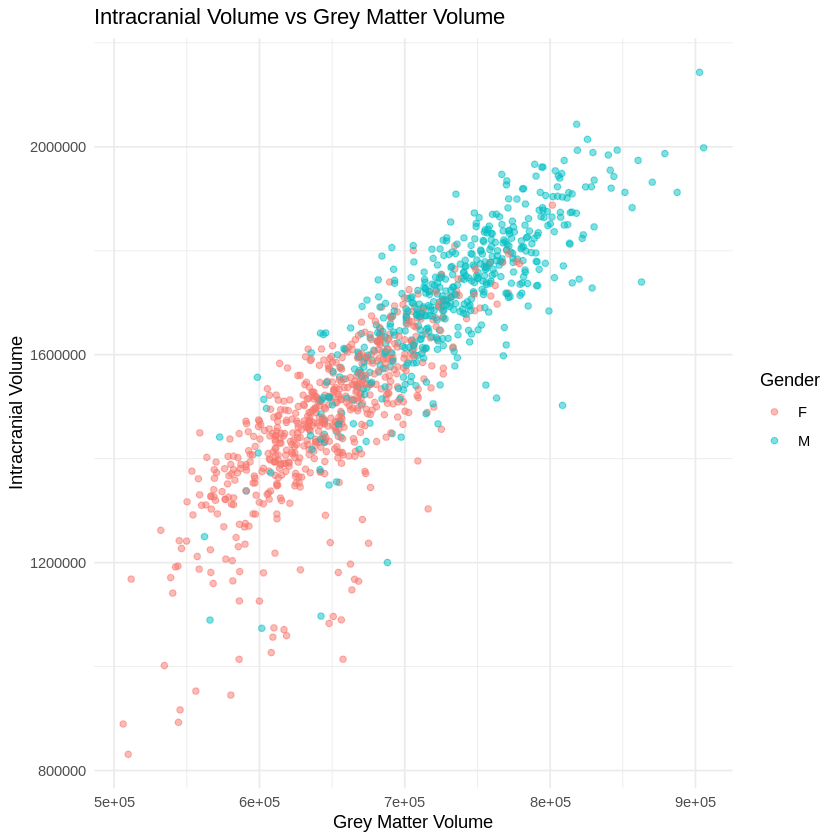

In [3]:
ggplot(d1, aes(x = 	FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point(size = 1.5, alpha = 0.5) +
  labs(x = "Grey Matter Volume", y = "Intracranial Volume", title = "Intracranial Volume vs Grey Matter Volume") +
  theme_minimal()

What patterns do you observe in the scatter plot?

> * Overall grey matter volume and intracranial volume appear positively correlated (greater GMV -> greater ICV). Furthermore men appear to have greater grey matter volume and intracranial volume than women.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [4]:
#Gender_dic: M=0, F=1
d1 <- d1 %>%
  mutate(Gender_dic = case_when(Gender=="M"~0, Gender=="F"~1))
#check
#head(d1)
glm.fit <- glm(Gender_dic~FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol, data=d1, family=binomial)
summary(glm.fit)


Call:
glm(formula = Gender_dic ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + 
    FS_IntraCranial_Vol, family = binomial, data = d1)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.262e+01  1.347e+00  16.787  < 2e-16 ***
FS_Tot_WM_Vol       -2.140e-06  3.059e-06  -0.699    0.484    
FS_Total_GM_Vol     -1.959e-05  3.145e-06  -6.229 4.70e-10 ***
FS_IntraCranial_Vol -5.020e-06  1.177e-06  -4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> * Total grey matter volume and intracranial volume are significantly associated with gender.

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [5]:
predicted_probs <- predict(glm.fit, d1, type = "response", threshold = 0.5)

predicted_probs_dic <- if_else(predicted_probs>0.5, 1, 0)

confusion_df <- data.frame(predicted = predicted_probs_dic,actual = d1$Gender_dic)
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted   0   1
        0 397  90
        1 110 516

[1] "---"
[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

>* 82.03% prediction accuracy for gender from the full model.

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 1113


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1113)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8203055 -0.000414928  0.01225527


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

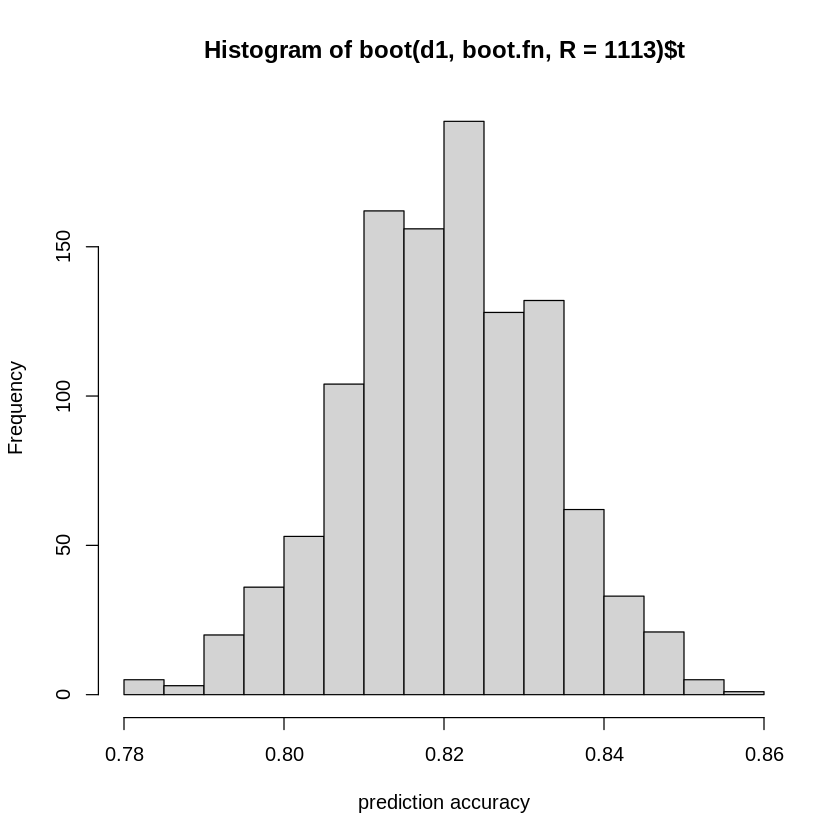

In [49]:
nrow(d1)

boot.fn <- function(data,index){
    d <- data[index,]
    glm.fit <- glm(Gender_dic~FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol, data=d, family=binomial)
    predicted_probs <- predict(glm.fit, d, type = "response", threshold = 0.5)
    predicted_probs_dic <- if_else(predicted_probs>0.5, 1, 0)
    confusion_df <- data.frame(predicted = predicted_probs_dic,actual = d$Gender_dic)
    accuracy <- mean(confusion_df$predicted == confusion_df$actual)
    return(accuracy)}

boot_obj = boot(d1,boot.fn,R=1113)
print(boot_obj)
attributes(boot_obj)
#boot(d1,boot.fn,R=1113)$t
hist(boot(d1,boot.fn,R=1113)$t, xlab="prediction accuracy")

In [50]:
my_boot <- boot(d1,boot.fn,R=1113)

In [68]:
sd_boot <- sd(my_boot$t)
sd_boot

ci_boot <- boot.ci(my_boot, conf = 0.95, type = "basic")
ci_boot
#CI = (0.7959, 0.8447)

[1] 0.01236871

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1113 bootstrap replicates

CALL : 
boot.ci(boot.out = my_boot, conf = 0.95, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.7959,  0.8447 )  
Calculations and Intervals on Original Scale

How robust is the prediction accuracy of the full model?

> * 95% of our model has accuracy between 79.59% and 84.47%, which is pretty good.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.8203055 -0.0009613657  0.01266935


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

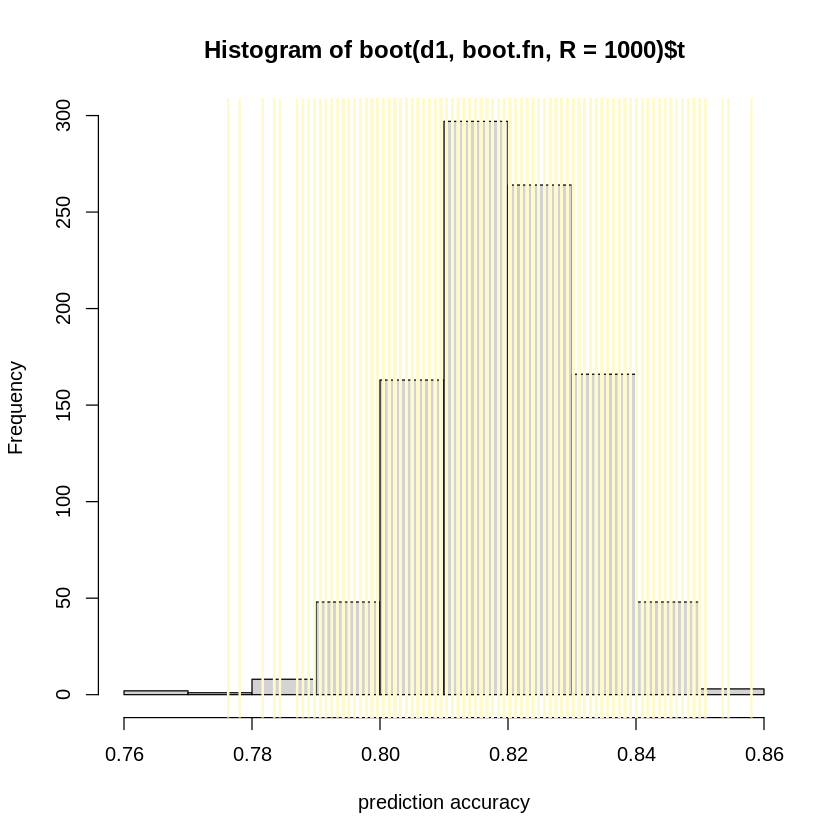

In [70]:
#i am so sorry, the best i could do was make it lemon chiffon color
boot_obj = boot(d1,boot.fn,R=1000)
print(boot_obj)
attributes(boot_obj)
hist(boot(d1,boot.fn,R=1000)$t, xlab="prediction accuracy")
abline(v = my_boot$t, col = "lemon chiffon", lwd = 2)

How much does the grey matter volume influence the prediction accuracy of the model?

> * I can't tell from the monstrosity I've created, but from the logistic regression earlier we see that, of the two statistically significant coefficients Grey Matter Volume (GMV) and Intracranial Volume (ICV), GMV = -1.96e-05 and ICV = -5.02e-06, hence |GMV| > |ICV|, hence GMV is about 3.9x greater than ICV. This indicates that GMV has a large influence on the prediction accuracy of our linear model, so I would except GMV to also have a large influence on the prediction accuracy of the permutation model.

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> * Bootstrapping quantifies uncertainty by random resampling (reusing data) and can output a range of expected values for a given statistic taking the data's variability into account.
> * Permutation testing breaks any apparent relationship between variables of interest and allows us to see patterns that we would expect is there were no relationship between given variables of interest.
> * We use bootstrapping to quantify uncertainty and calculate statistic ranges given that uncertainty, and we permutation testing to test the null hypothesis and quantify null distributions.

**DUE:** 5pm EST, March 27, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*